In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

ds_folder = f'/mnt/data2/chaoyue/data/FDOH-DDT'
for dirname, _, filenames in os.walk(ds_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_0_before2015_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_mean_before2015_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/test.csv
/mnt/data2/chaoyue/data/FDOH-DDT/test_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_0_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/cluster_dynamics_FDOH_mono.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_0_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_mean_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_edges_metadata_mono_DDT.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_0_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_before2015_node.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
%matplotlib inline

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Import the files
node_df = pd.read_csv(f'{ds_folder}/cluster_dynamics_FDOH_mono.csv')
edge_df = pd.read_csv(f'{ds_folder}/FDOH_edges_metadata_mono_DDT.csv')

/home/chaoyue/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,10,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Background,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Background,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038
62109,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061
62110,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050
62111,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077


In [6]:
edge_df.loc[31058]

from                     31059
to                       31059
weight1                    NaN
label                      NaN
genotype_yr                NaN
county_name                NaN
birth_sex                  NaN
dob_yr                     NaN
expo_categ                 NaN
race                       NaN
birth_country_cd           NaN
hiv_dx_yr                  NaN
Age_dx                     NaN
age_cat                    NaN
expo                       NaN
race_eth                   NaN
cluster_id          Background
clustersize                NaN
weight2                    NaN
Name: 31058, dtype: object

In [7]:
edge_df = edge_df.drop(index=31058)
edge_df.reset_index()

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2
0,0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155
1,1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461
2,2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032
3,3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005
4,4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,62108,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038
62108,62109,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061
62109,62110,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050
62110,62111,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077


In [8]:
edge_df[~edge_df['label'].isna()]

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31053,62111,31054,0.00784,859.0,2017.0,BROWARD CO.,M,1950.0,1.0,6.0,USA,1990.0,40.0,36to45,MSM,White,Background,NaN,0.000078
31054,62111,31055,0.03319,11984.0,2015.0,ESCAMBIA CO.,M,1978.0,6.0,6.0,USA,2001.0,23.0,20to25,MSM,White,Background,NaN,0.000300
31055,62112,31056,0.02086,46203.0,2016.0,HILLSBOROUGH CO.,M,1963.0,1.0,6.0,USA,1992.0,29.0,26to35,MSM,White,Background,NaN,0.000223
31056,62113,31057,0.00859,3719.0,2016.0,BROWARD CO.,M,1973.0,1.0,1.0,USA,2006.0,33.0,26to35,MSM,Hispanic,Background,NaN,0.000079


In [9]:
import networkx as nx
G = nx.from_pandas_edgelist(edge_df, source='from', target='to')
a = 0
for node in G:
    if G.degree(node) == 1:
        a += 1

In [10]:
a

31058

### Edge feature processing

In [14]:
aly_edge_feat_cols = ['weight1', 'weight2']
aly_edge_df = edge_df[aly_edge_feat_cols]

In [15]:
aly_edge_df.describe()

,weight1,weight2
count,62112.000000,62112.000000
mean,0.012406,0.000122
std,0.012847,0.000127
min,0.000000,0.000000
25%,0.002520,0.000025
50%,0.007050,0.000069
75%,0.019340,0.000191
max,0.100060,0.000988


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>]], dtype=object)

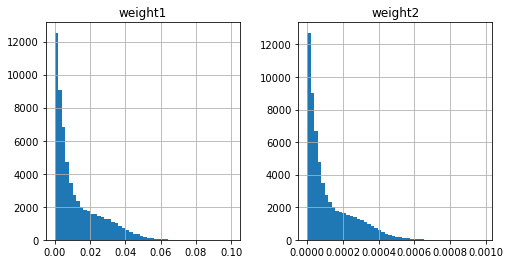

In [16]:
aly_edge_df.hist(bins=50,figsize=(8,4))

In [17]:
edge_df.loc[:, 'weight1_arsinh'] = np.arcsinh(edge_df['weight1'])
edge_df.loc[:, 'weight2_arsinh'] = np.arcsinh(edge_df['weight2'])

array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh'}>,
        <AxesSubplot:title={'center':'weight2_arsinh'}>]], dtype=object)

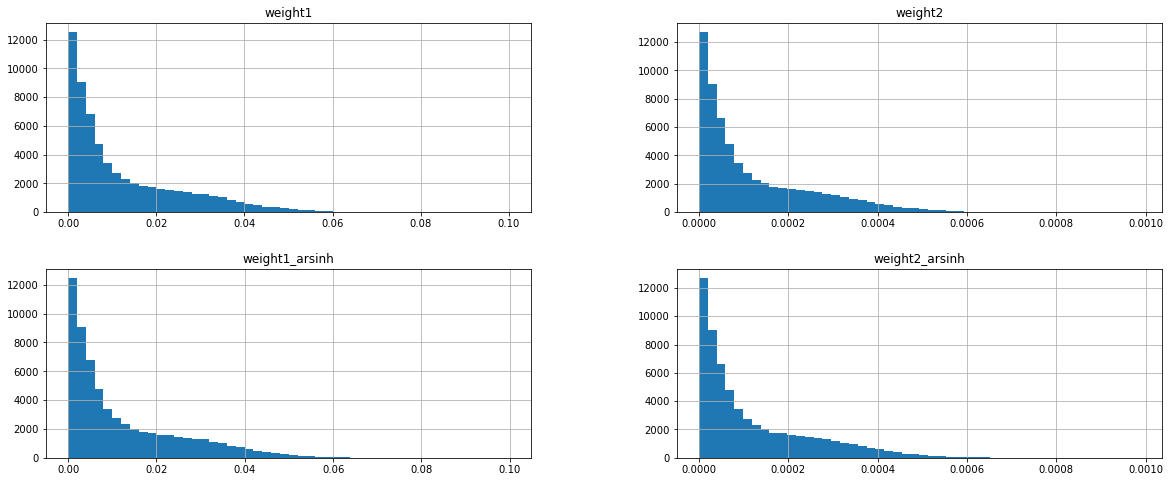

In [18]:
aly_edge_feat_cols += ['weight1_arsinh', 'weight2_arsinh']

edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

In [19]:
from sklearn import preprocessing

# Standardization edge features
std_scaler = preprocessing.StandardScaler().fit(edge_df[aly_edge_feat_cols])
norm_num_feat_cols = [f'{col_name}-norm' for col_name in aly_edge_feat_cols]

norm_train_vals = std_scaler.transform(edge_df[aly_edge_feat_cols])
norm_train_edge_df = pd.DataFrame(norm_train_vals, columns=norm_num_feat_cols, index=edge_df.index)
edge_df = pd.concat([edge_df, norm_train_edge_df], axis=1)

In [20]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461,0.046084,0.000461,2.622702,2.663988,2.622354,2.663988
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005,0.000550,0.000005,-0.922843,-0.923762,-0.922977,-0.923762
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098,0.009040,0.000098,-0.261994,-0.192209,-0.261941,-0.192209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491
62109,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336
62110,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501
62111,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077,0.007560,0.000077,-0.377195,-0.352535,-0.377172,-0.352535


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh'}>,
        <AxesSubplot:title={'center':'weight2_arsinh'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh-norm'}>,
        <AxesSubplot:title={'center':'weight2_arsinh-norm'}>]],
      dtype=object)

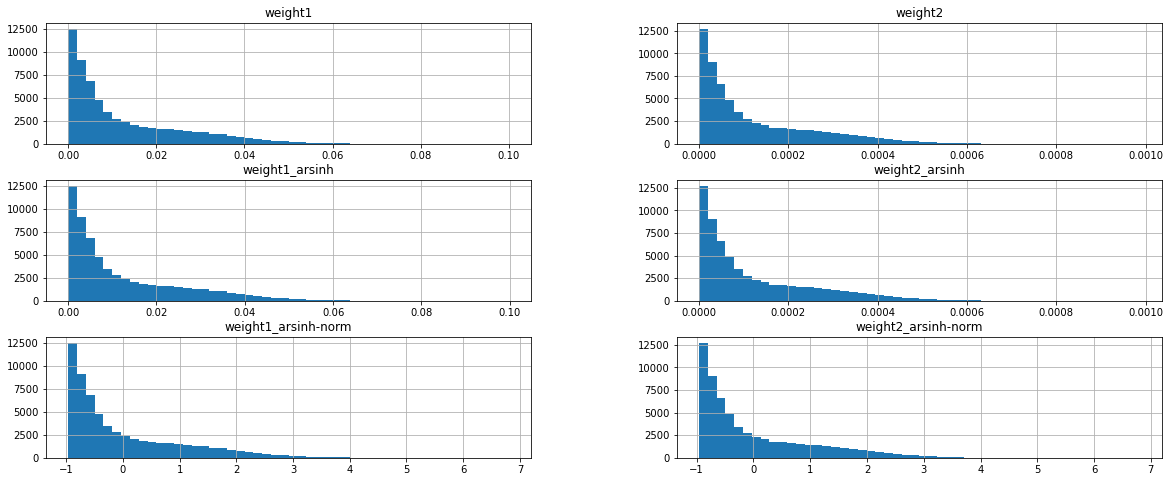

In [21]:
aly_edge_feat_cols += ['weight1_arsinh-norm', 'weight2_arsinh-norm']

edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

In [22]:
edge_df.to_csv(f'{ds_folder}/test_edge.csv', index=False)

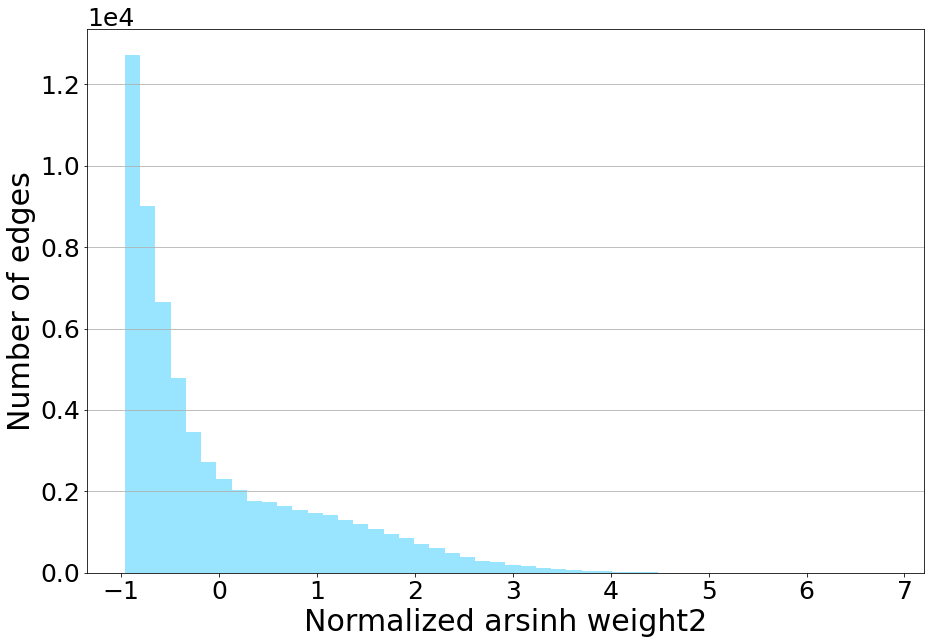

In [111]:
i = 5
feat = aly_edge_feat_cols[i]
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(edge_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
ax1.axes.set_ylabel("Number of edges",fontsize=30)
ax1.axes.set_xlabel("Normalized arsinh weight2",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/fdoh/edge_dist/{feat}.svg",dpi=600,format='svg')

### Process node data

In [28]:
prep_dict = np.load(f"../aly/prep-resp+TB_20230310.npy",allow_pickle=True)
prep_dict

array({'dynamic': {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}, 'gamma_bins': array([-7.14782788e+04, -4.18408234e+00, -1.15355284e+00,  9.15811626e-01,
                   inf]), 'gamma_cat_dict': {Interval(0.916, inf, closed='right'): 0, Interval(-4.184, -1.154, closed='right'): 1, Interval(-1.154, 0.916, closed='right'): 2, Interval(-71478.28, -4.184, closed='right'): 3}, 'ltt_shape': {0: 'concave', 1: 'concave_convex', 2: 'convex', 3: 'convex_concave'}, 'gamma': {0: "(0.916, inf, 'right')", 1: "(-4.184, -1.154, 'right')", 2: "(-1.154, 0.916, 'right')", 3: "(-71478.28, -4.184, 'right')"}, 'r0': 1.8806286709062279, 'feat': ['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max', 'cherries', 'BLD', 'new_R0'], 'mean': array([5.09553331e-01, 4.90240925e+02, 3.42845029e+01, 3.42964209e+01,
       7.64572099e+02, 1.97245406e+03, 4.38075371e-01, 2.02050822e+02,
       3.08608291e-01, 6.74725250e-01, 1.88062867e+00]), 'std'

### Split the nodes into background and non-background

In [29]:
background_df = node_df[node_df['cluster_id']=='Background']
background_df 

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Background,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Background,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
node_df = node_df[node_df['cluster_id']!='Background']
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30283,1632,30284,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30284,1632,30285,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30285,1632,30286,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000


In [31]:
node_df.isnull().sum()

cluster_id                 0
node                       0
v_timespan              1250
gamma                      0
oster                      0
abs_growth_rate          358
fraction_time_growth     358
r_max                    358
ltt_shape                  0
PD                         0
cherries                   0
dtype: int64

### impute mean

In [32]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30283,1632,30284,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30284,1632,30285,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000
30285,1632,30286,NaN,0.389569,32.935761,NaN,NaN,NaN,convex,0.01890,0.200000


In [33]:
i=5
for item in ['abs_growth_rate','fraction_time_growth','r_max']:
    node_df[item].iloc[node_df[item].isna()] = prep_dict.item()['mean'][i]
    i+=1

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
node_df.isnull().sum()

cluster_id                 0
node                       0
v_timespan              1250
gamma                      0
oster                      0
abs_growth_rate            0
fraction_time_growth       0
r_max                      0
ltt_shape                  0
PD                         0
cherries                   0
dtype: int64

In [35]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000


### Preprocessing-1: Gamma discretization
    * Quantile-based discretization function

In [36]:
gamma_bins = prep_dict.item()['gamma_bins']
gamma_cat_dict = prep_dict.item()['gamma_cat_dict']

In [37]:
gamma_cat_dict

{Interval(0.916, inf, closed='right'): 0,
 Interval(-4.184, -1.154, closed='right'): 1,
 Interval(-1.154, 0.916, closed='right'): 2,
 Interval(-71478.28, -4.184, closed='right'): 3}

In [38]:
for interval in gamma_cat_dict.keys():
    final = interval
final

Interval(-71478.28, -4.184, closed='right')

In [39]:
gamma_bins

array([-7.14782788e+04, -4.18408234e+00, -1.15355284e+00,  9.15811626e-01,
                   inf])

In [40]:
gamma_cats = []
for i in range(len(node_df)):
    for interval in gamma_cat_dict.keys():
        if node_df['gamma'].iloc[i] in interval:
            gamma_cats.append(gamma_cat_dict[interval])
            break
        elif node_df['gamma'].iloc[i] <= gamma_bins[0]:
            gamma_cats.append(gamma_cat_dict[final])
            break

In [41]:
set(gamma_cats)

{0, 1, 2, 3}

In [42]:
node_df['gamma_cat'] = gamma_cats
print(f'Gamma cat: {node_df["gamma_cat"].unique()}')
node_df

Gamma cat: [1 2 3 0]


/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2


In [43]:
ltt_dict = prep_dict.item()['ltt_shape']
rltt_dict = {}
for i in range(4):
    rltt_dict[ltt_dict[i]] = i
rltt_dict

{'concave': 0, 'concave_convex': 1, 'convex': 2, 'convex_concave': 3}

In [44]:
node_df["ltt_shape_cat"] = node_df["ltt_shape"].map(rltt_dict)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [45]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2


### Impute BLD and R0

In [46]:
#R_max
node_df['new_R0'] = prep_dict.item()['mean'][10]
#BLD
node_df['BLD'] = prep_dict.item()['mean'][9]

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [47]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725


In [63]:
num_feat_cols = ["oster", "PD",
                 "abs_growth_rate", "fraction_time_growth", "r_max","cherries","BLD","new_R0"]
aly_col = num_feat_cols + cat_feat_cols
#aly_col = num_feat_cols
print(aly_col)

aly_df = node_df[aly_col]

['oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max', 'cherries', 'BLD', 'new_R0', 'ltt_shape_cat', 'gamma_cat']


In [105]:
Paper_feat = ['Oster', 'PD', 'Abs Growth Rate','Fraction Time Growth',r'$R_{max}$',
              'Cherries','BLD',r'$R_0$', 'LTT Shape category',r'$\gamma$ category']

### Processing-1. One-hot encoding for the categorical feature
* ltt_shape_cat
* gamma_cat

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

cat_feat_cols = ['ltt_shape_cat','gamma_cat']
print(cat_feat_cols)
cat_onehot_feat = []
org_idx = node_df.index

for cat_feat in cat_feat_cols:
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    x = enc.fit_transform(node_df[cat_feat].values.reshape(-1, 1))
    n_dims = x.shape[-1]
    columns = [f'{cat_feat}_{i}' for i in range(n_dims)]
    cat_onehot_feat += columns
    cat_df = pd.DataFrame(x, index=org_idx, columns=columns)
    node_df = pd.concat([node_df, cat_df], axis=1)


['ltt_shape_cat', 'gamma_cat']


### Processing-3. Normalize the input features:
* Use Standardization
* Use MinMax normalization to normalize data to [0, 1]

In [76]:
node_df.describe()

,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
count,1250.000000,0.0,1250.000000,1250.000000,1.250000e+03,1250.000000,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,16342.967200,NaN,0.625996,46.904699,inf,0.415043,inf,0.053194,0.282400,1.463200,1.495200,1.880629e+00,6.747253e-01,0.084800,0.431200,0.38800,0.096000,0.263200,0.236800,0.273600,0.226400
std,9617.238119,NaN,42.769230,23.600283,NaN,0.249877,NaN,0.038483,0.079793,1.108526,0.782347,1.777068e-15,1.332801e-14,0.278695,0.495442,0.48749,0.294709,0.440546,0.425289,0.445984,0.418668
min,8.000000,NaN,-221.311395,15.425251,4.010943e-01,0.000000,-4.686700e+270,0.005660,0.125000,0.000000,0.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7518.250000,NaN,-2.882890,29.925044,1.972454e+03,0.229412,2.020508e+02,0.027613,0.214286,0.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17583.500000,NaN,-0.975575,40.562104,1.648624e+185,0.438075,1.176500e+186,0.036070,0.266667,1.500000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24779.750000,NaN,1.262573,56.942217,1.261905e+244,0.465753,4.706501e+245,0.068560,0.333333,2.000000,2.000000,1.880629e+00,6.747253e-01,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000
max,30287.000000,NaN,432.042959,150.266430,inf,1.000000,inf,0.165540,0.428571,3.000000,3.000000,1.880629e+00,6.747253e-01,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### impute inf as max number 

In [77]:
node_df[node_df['abs_growth_rate']<np.inf]['abs_growth_rate'].max()

7.69804718114699e+307

In [78]:
for item in ['abs_growth_rate','r_max']:
    node_df[item].iloc[node_df[item]==np.inf] = node_df[node_df[item]<np.inf][item].max()

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [79]:
node_df.describe()

,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
count,1250.000000,0.0,1250.000000,1250.000000,1.250000e+03,1250.000000,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,16342.967200,NaN,0.625996,46.904699,inf,0.415043,inf,0.053194,0.282400,1.463200,1.495200,1.880629e+00,6.747253e-01,0.084800,0.431200,0.38800,0.096000,0.263200,0.236800,0.273600,0.226400
std,9617.238119,NaN,42.769230,23.600283,inf,0.249877,inf,0.038483,0.079793,1.108526,0.782347,1.777068e-15,1.332801e-14,0.278695,0.495442,0.48749,0.294709,0.440546,0.425289,0.445984,0.418668
min,8.000000,NaN,-221.311395,15.425251,4.010943e-01,0.000000,-4.686700e+270,0.005660,0.125000,0.000000,0.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7518.250000,NaN,-2.882890,29.925044,1.972454e+03,0.229412,2.020508e+02,0.027613,0.214286,0.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17583.500000,NaN,-0.975575,40.562104,1.648624e+185,0.438075,1.176500e+186,0.036070,0.266667,1.500000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24779.750000,NaN,1.262573,56.942217,1.261905e+244,0.465753,4.706501e+245,0.068560,0.333333,2.000000,2.000000,1.880629e+00,6.747253e-01,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000
max,30287.000000,NaN,432.042959,150.266430,7.698047e+307,1.000000,7.154401e+306,0.165540,0.428571,3.000000,3.000000,1.880629e+00,6.747253e-01,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'oster'}>,
        <AxesSubplot:title={'center':'PD'}>,
        <AxesSubplot:title={'center':'abs_growth_rate'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth'}>,
        <AxesSubplot:title={'center':'r_max'}>,
        <AxesSubplot:title={'center':'cherries'}>],
       [<AxesSubplot:title={'center':'BLD'}>,
        <AxesSubplot:title={'center':'new_R0'}>, <AxesSubplot:>]],
      dtype=object)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2222: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


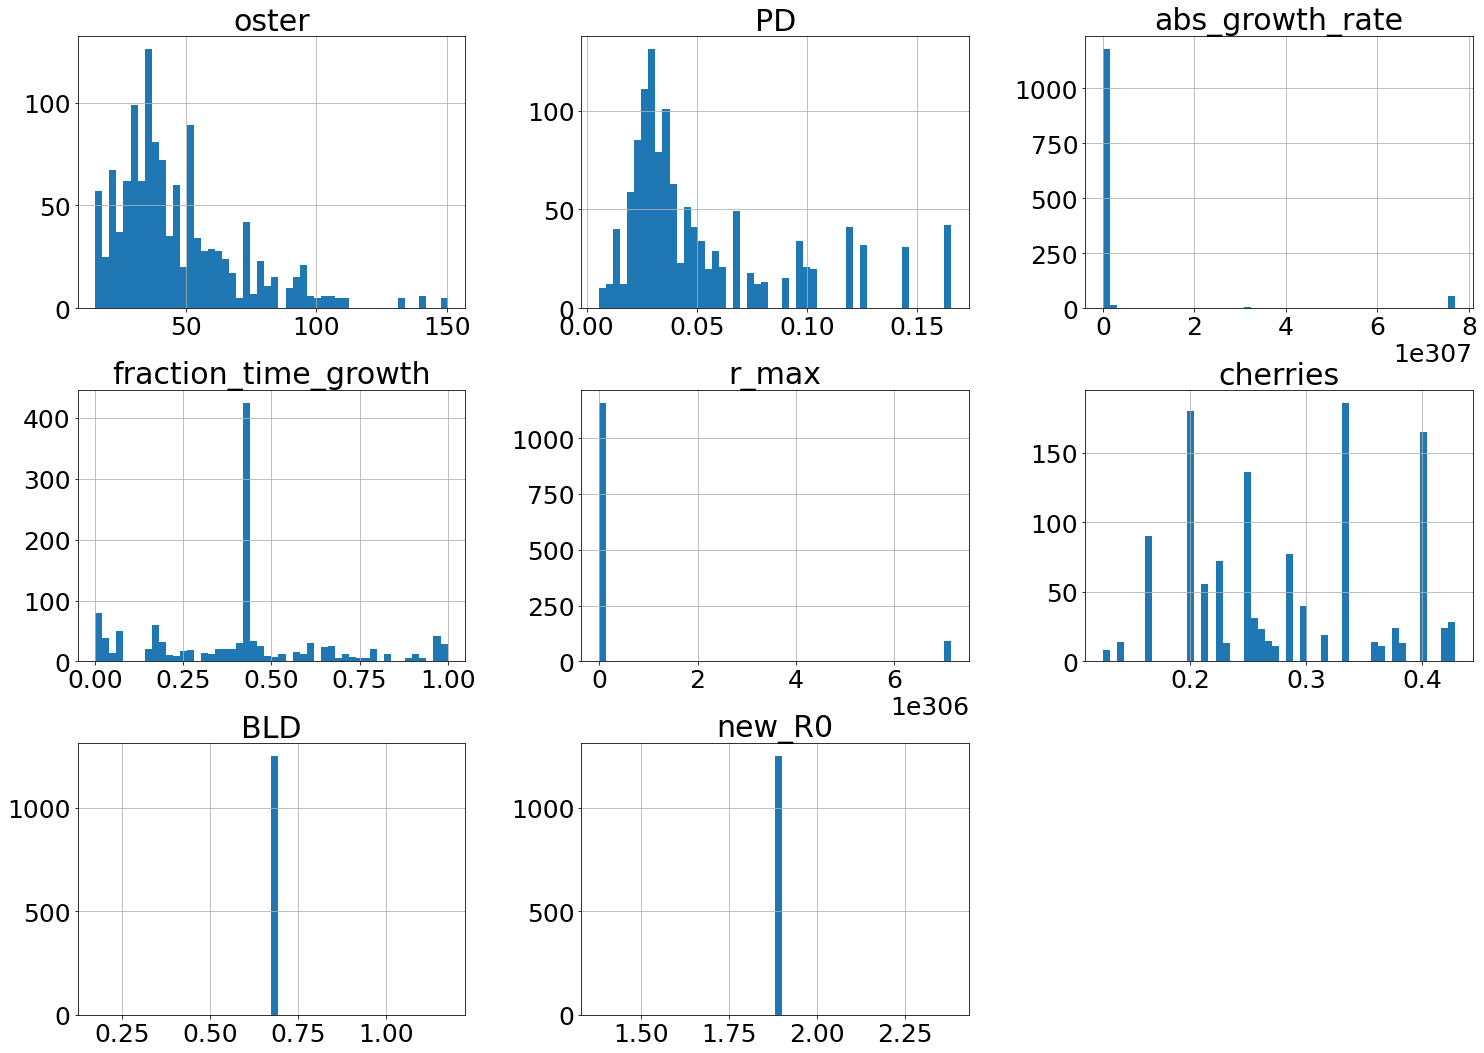

In [80]:
node_df[num_feat_cols].hist(bins=50,figsize=(25, 18))

In [81]:
num_feat_cols

['oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0']

In [82]:
cat_feat_cols

['ltt_shape_cat', 'gamma_cat']

In [83]:
feat_cols = num_feat_cols+cat_feat_cols
feat_cols

['oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0',
 'ltt_shape_cat',
 'gamma_cat']

In [84]:
node_df[num_feat_cols]

,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0
7,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
8,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
9,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
10,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
11,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
...,...,...,...,...,...,...,...,...
30282,32.935761,0.01890,1.972454e+03,0.438075,2.020508e+02,0.200000,0.674725,1.880629
30283,32.935761,0.01890,1.972454e+03,0.438075,2.020508e+02,0.200000,0.674725,1.880629
30284,32.935761,0.01890,1.972454e+03,0.438075,2.020508e+02,0.200000,0.674725,1.880629
30285,32.935761,0.01890,1.972454e+03,0.438075,2.020508e+02,0.200000,0.674725,1.880629


In [85]:
std_scaler = preprocessing.StandardScaler().fit(node_df[num_feat_cols])
std_scaler.mean_ = prep_dict.item()['mean'][3:]
std_scaler.scale_ = prep_dict.item()['std'][3:]

/home/chaoyue/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/chaoyue/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [86]:
# Standardization non-category features
norm_num_feat_cols = [f'{col_name}-norm' for col_name in num_feat_cols]
norm_vals = std_scaler.transform(node_df[num_feat_cols])
norm_node_df = pd.DataFrame(norm_vals, columns=norm_num_feat_cols, index=node_df.index)
node_df = pd.concat([node_df, norm_node_df], axis=1)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([[<AxesSubplot:title={'center':'oster-norm'}>,
        <AxesSubplot:title={'center':'PD-norm'}>,
        <AxesSubplot:title={'center':'abs_growth_rate-norm'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth-norm'}>,
        <AxesSubplot:title={'center':'r_max-norm'}>,
        <AxesSubplot:title={'center':'cherries-norm'}>],
       [<AxesSubplot:title={'center':'BLD-norm'}>,
        <AxesSubplot:title={'center':'new_R0-norm'}>, <AxesSubplot:>]],
      dtype=object)

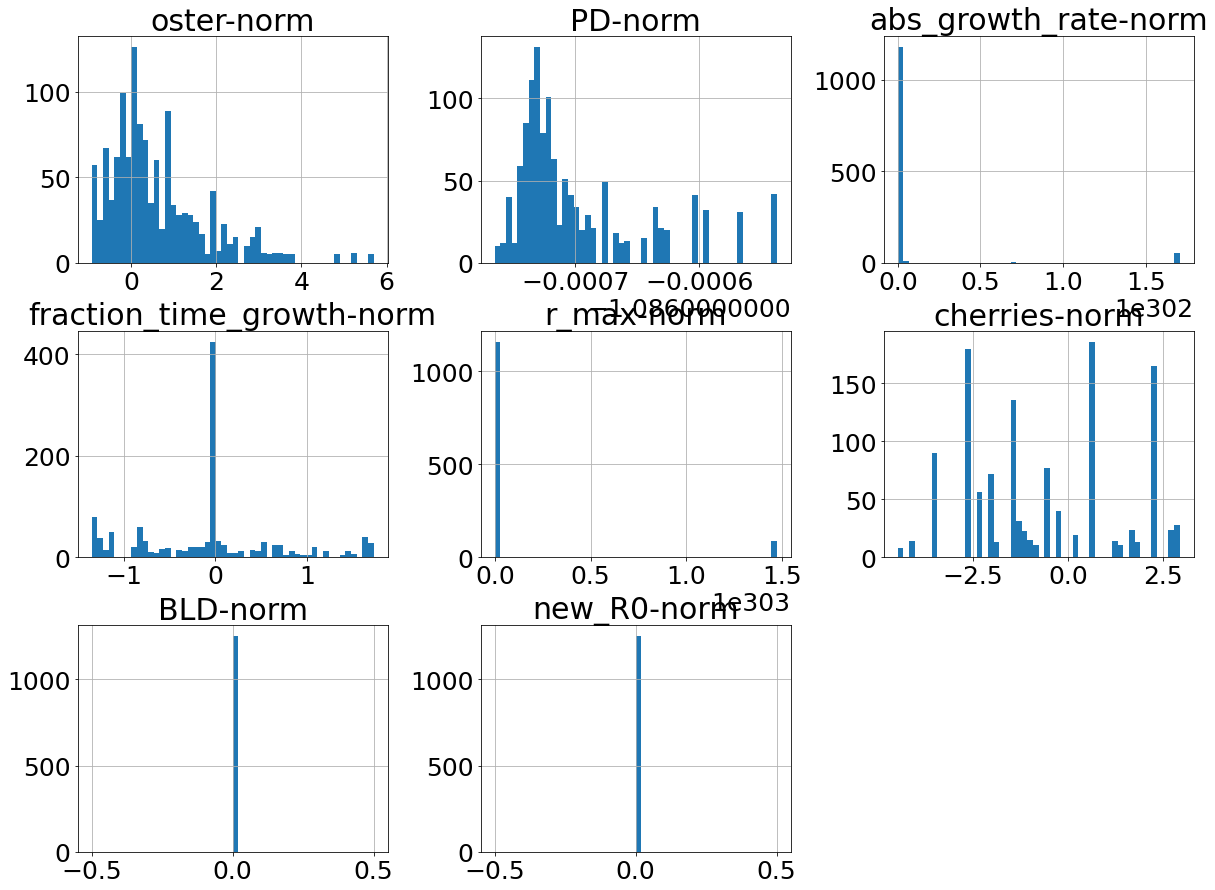

In [87]:
node_df[norm_num_feat_cols].hist(bins=50,figsize=(20,15))

In [88]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2,2,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0


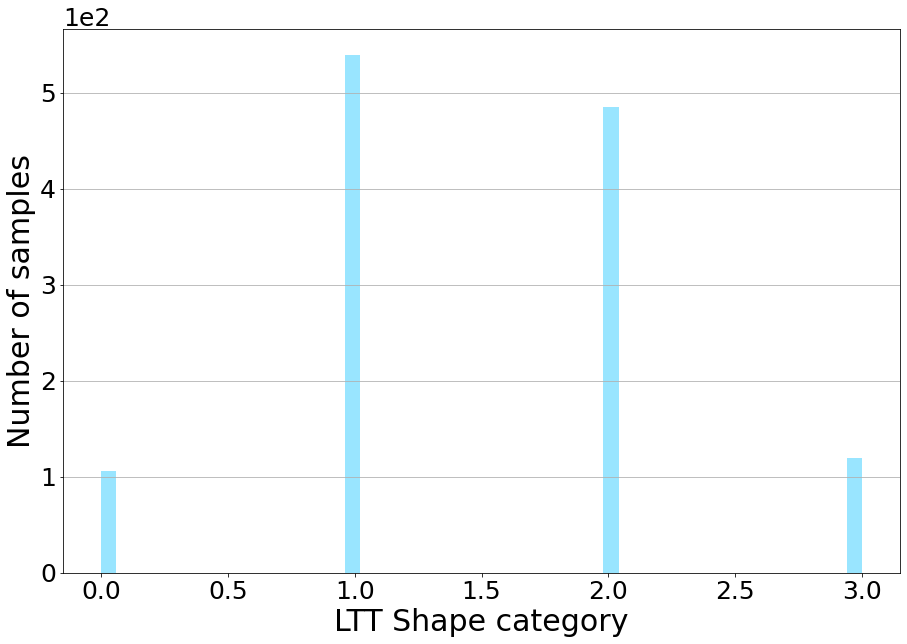

In [107]:
i = -2
feat = aly_col[i]
#for feat in feat_cols:
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(node_df[feat],bins=50,hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
#ax1.set(ylim=(0,1700000))
ax1.axes.set_ylabel("Number of samples",fontsize=30)
ax1.axes.set_xlabel(f"{Paper_feat[i]}",fontsize=30)
#ax1.axes.set_xlabel(f"{Paper_feat[i]} category",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/fdoh/feat_dist/{feat}.svg",bbox_inches='tight',pad_inches=0.0,dpi=600,format='svg')

In [102]:
i = 8
feat = norm_num_feat_cols[i]
#for feat in feat_cols:
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(node_df[feat],bins=50,hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
#ax1.set(ylim=(0,1700000))
ax1.axes.set_ylabel("Number of samples",fontsize=30)
ax1.axes.set_xlabel(f"{Paper_feat[i]}",fontsize=30)
#ax1.axes.set_xlabel(f"{Paper_feat[i]} category",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/fdoh/norm_feat_dist/{feat}.svg",bbox_inches='tight',pad_inches=0.0,dpi=600,format='svg')

IndexError: list index out of range

### Merge the background and non-background nodes

In [55]:
full_df = pd.concat([node_df, background_df])
print(f'Train: {full_df.shape}')

Train: (62113, 31)


In [56]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
full_df.to_csv(f'{ds_folder}/test.csv', index=False)

In [58]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461,0.046084,0.000461,2.622702,2.663988,2.622354,2.663988
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005,0.000550,0.000005,-0.922843,-0.923762,-0.922977,-0.923762
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098,0.009040,0.000098,-0.261994,-0.192209,-0.261941,-0.192209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491
62109,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336
62110,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501
62111,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077,0.007560,0.000077,-0.377195,-0.352535,-0.377172,-0.352535


In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import networkx as nx
import torch

Using backend: pytorch


In [61]:
src_ids = torch.tensor(edge_df['from'].values)
dst_ids = torch.tensor(edge_df['to'].values)

# Note: the start idx of the node is 0 not 1. But simulation node starts with 1
# We need substract 1 to the node idx for edges and nodes files.
src_ids -= 1
dst_ids -= 1

In [62]:
g = dgl.graph((src_ids, dst_ids))
nx_g = dgl.to_networkx(g)

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

Nodes: 62113
Edges: 62112


In [63]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  2 15:11:58 2021

@author: Suncy
"""

import numpy as np # linear algebra
import dgl
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
#from dl import feat_dict


######################################## Network Model ############################################

# message passing user-defined functions
# could define different message passing strategy 

def edge_udf(edges):
    # cat states of edge and source node
    #cat_feat = torch.cat((edges.src['h_feat'],edges.data['h_feat']),1)
    cat_feat = torch.cat((edges.src['h_feat'],edges.data['h_feat'],edges.dst['h_feat']),1)
    return {'cat': cat_feat}
  

def node_udf(edges):
    # send edge state to dst node
    return {'h_feat': edges.data['h_feat']}


def reducer(nodes):
    # cat states of node and in-bound edge
    cat_feat = torch.cat((torch.sum(nodes.mailbox['h_feat'],1),nodes.data['h_feat']),1)
    #cat_feat = torch.cat((nodes.mailbox['h_feat'][:,0,:],nodes.data['h_feat']),1)
    return {'cat': cat_feat} 


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.h_feat = 64
        self.num_iter = 13
        n_feats = 16
        e_feats = 2
        num_classes = 4
        self.device = torch.device("cpu")
        
        # node LSTM & edge LSTM
        # 21 dim node feature & 2 dim edge feature
        self.Node_LSTM = nn.LSTMCell(n_feats, self.h_feat)
        self.Edge_LSTM = nn.LSTMCell(e_feats, self.h_feat)
        
        self.m = nn.LeakyReLU()
        
        # message passing network
        self.node_mpn = nn.Linear(2*self.h_feat, n_feats)
        self.edge_mpn = nn.Linear(3*self.h_feat, e_feats)

        # batch normalization on messages
        #self.node_bn = nn.BatchNorm1d(n_feats)
        #self.edge_bn = nn.BatchNorm1d(e_feats)

        # linear classifier
        self.fc = nn.Linear(self.h_feat, num_classes)
    
    def forward(self, g):
        info = dict()
        # num of nodes & edges in batched g
        num_nodes = g.ndata['feat'].shape[0]
        num_edges = g.edata['feat'].shape[0]
        
        # initialization of hidden state and cell state
        g.ndata['h_feat'] = torch.zeros(num_nodes, self.h_feat).to(self.device)
        g.ndata['c_feat'] = torch.zeros(num_nodes, self.h_feat).to(self.device)
        g.edata['h_feat'] = torch.zeros(num_edges, self.h_feat).to(self.device)
        g.edata['c_feat'] = torch.zeros(num_edges, self.h_feat).to(self.device)
        
        for i in range(self.num_iter):
            if i == 0: # first iteration, input is feature vec
                g.ndata['h_feat'], g.ndata['c_feat'] = self.Node_LSTM(g.ndata['feat'], (g.ndata['h_feat'], g.ndata['c_feat']))
                g.edata['h_feat'], g.edata['c_feat'] = self.Edge_LSTM(g.edata['feat'], (g.edata['h_feat'], g.edata['c_feat']))
            else: # later iteration, input is message
                g.ndata['h_feat'], g.ndata['c_feat'] = self.Node_LSTM(g.ndata['msg'], (g.ndata['h_feat'], g.ndata['c_feat']))
                g.edata['h_feat'], g.edata['c_feat'] = self.Edge_LSTM(g.edata['msg'], (g.edata['h_feat'], g.edata['c_feat']))
            
            
            # message passing
            g.apply_edges(edge_udf) # update the feature vector of edges
            #g.edata['msg'] = self.edge_bn(self.m(self.edge_mpn(g.edata['cat']))) # generate edge message
            g.edata['msg'] = self.m(self.edge_mpn(g.edata['cat'])) # generate edge message
            g.update_all(node_udf,reducer) # send edge state to dst nodes
            #g.ndata['msg'] = self.node_bn(self.m(self.node_mpn(g.ndata['cat']))) # generate node message
            g.ndata['msg'] = self.m(self.node_mpn(g.ndata['cat'])) # generate node message
      
        # linear classifier
        output = self.fc(g.ndata['h_feat'])
        
        #return output, g.ndata['h_feat'], info  # for embedding vectors
        
        return output, info
    
    def ce_loss(self, y_pred, y_true, weight=None):
        # print(y_pred.shape, y_true.shape, weight.shape)
        ce = F.cross_entropy(y_pred, y_true, weight=weight, size_average=None, reduce=None, reduction='mean')
        return {"loss": ce}


In [64]:
device = torch.device("cpu")

In [65]:
model = Net()
model.to(device)

Net(
  (Node_LSTM): LSTMCell(16, 64)
  (Edge_LSTM): LSTMCell(2, 64)
  (m): LeakyReLU(negative_slope=0.01)
  (node_mpn): Linear(in_features=128, out_features=16, bias=True)
  (edge_mpn): Linear(in_features=192, out_features=2, bias=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

In [66]:
# load weight of model
from collections import OrderedDict
restore_file = osp.join('../dl/nov_save/exp/pdglstm_0/weight/loss/model.pth.tar')
checkpoint = torch.load(restore_file)
d2 = OrderedDict([(k[7:], v) for k, v in checkpoint['state_dict'].items()])
model.load_state_dict(d2)

<All keys matched successfully>

In [67]:
norm_onehot_feats = [
        "oster-norm",
        "PD-norm",
        "abs_growth_rate-norm",
        "fraction_time_growth-norm",
        "r_max-norm",
        "cherries-norm",
        "BLD-norm",
        "new_R0-norm",
        "ltt_shape_cat_0",
        "ltt_shape_cat_1",
        "ltt_shape_cat_2",
        "ltt_shape_cat_3",
        "gamma_cat_0",
        "gamma_cat_1",
        "gamma_cat_2",
        "gamma_cat_3"
    ]

In [68]:
full_df.loc[full_df["cluster_id"] == 'Background', norm_onehot_feats] = 0
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0


In [69]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0


In [70]:
src_ids = torch.tensor(edge_df['from'].values)
dst_ids = torch.tensor(edge_df['to'].values)
src_ids -= 1
dst_ids -= 1
g = dgl.graph((src_ids, dst_ids))  # create dgl
sorted_onetree_node_df = full_df.sort_values(by='node')
        
# assign features and labels for background nodes
node_feat = sorted_onetree_node_df[norm_onehot_feats].values
num_nodes = node_feat.shape[0]
num_feat = node_feat.shape[1]

# assign features for nodes and edges, assign labels
g.ndata["feat"] = torch.tensor(node_feat, dtype=torch.float32)
g.edata["feat"] = torch.tensor(edge_df[["weight1_arsinh-norm","weight2_arsinh-norm"]].values, dtype=torch.float32)
g = dgl.add_reverse_edges(g, copy_ndata=True, copy_edata=True)


In [71]:
model.eval()
pred = model(g)

In [72]:
pred

(tensor([[ 1.8885,  1.6372,  0.5170, -5.1047],
         [ 1.9425,  1.1747,  0.1803, -3.7605],
         [    nan,     nan,     nan,     nan],
         ...,
         [ 3.1341,  0.4536,  0.2686, -4.5399],
         [ 1.8370,  1.1666,  0.3218, -4.0803],
         [ 2.0180,  1.5231,  0.0734, -4.4456]], grad_fn=<AddmmBackward>),
 {})

In [73]:
pred[0].detach().numpy()[:,:-1]

array([[1.8885233 , 1.6371982 , 0.51702285],
       [1.9424629 , 1.174732  , 0.18027222],
       [       nan,        nan,        nan],
       ...,
       [3.1340864 , 0.45357087, 0.268563  ],
       [1.8370442 , 1.1665853 , 0.32176822],
       [2.0179558 , 1.5231241 , 0.07340118]], dtype=float32)

In [74]:
pred_label = np.argmax(pred[0].detach().numpy()[:,:-1],axis=1)

In [75]:
g.ndata["pred"] = torch.tensor(pred_label).to(device)

In [76]:
sorted_onetree_node_df['pred'] = pred_label

In [77]:
clu = sorted_onetree_node_df['cluster_id'].unique()

In [78]:
sorted_onetree_node_df[sorted_onetree_node_df['cluster_id']!='Background']

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm,pred
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0,0
8,421,9,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0,0
9,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0,0
10,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0,0
11,421,12,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30282,1632,30283,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2.0,2.0,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0,0
30283,1632,30284,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2.0,2.0,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0,0
30284,1632,30285,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2.0,2.0,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0,0
30285,1632,30286,NaN,0.389569,32.935761,1.972454e+03,0.438075,2.020508e+02,convex,0.01890,0.200000,2.0,2.0,1.880629,0.674725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.066842,-1.086746,0.000000e+00,0.00000,0.000000e+00,-2.649086,0.0,0.0,2


In [85]:
clu_labels = []
result = {}
for c in clu:
    if c == 'Background':
        continue
    one_clu = sorted_onetree_node_df[sorted_onetree_node_df['cluster_id']==c]
    count = np.array([len(one_clu[one_clu['pred'] == 0]),
        len(one_clu[one_clu['pred'] == 1]),
        len(one_clu[one_clu['pred'] == 2])])
    print(count)
    if np.argmax(count) == 0:
        s = 'static'
    elif np.argmax(count) == 1:
        s = 'decay'
    elif np.argmax(count) == 2:
        s = 'growth'
    clu_labels.append(s)
    result[c] = s
    print(f"Cluster ID: {c}, dynamic: {s}")

[6 0 0]
Cluster ID: 421, dynamic: static
[9 0 0]
Cluster ID: 515, dynamic: static
[12  0  0]
Cluster ID: 914, dynamic: static
[8 0 0]
Cluster ID: 1541, dynamic: static
[5 0 0]
Cluster ID: 946, dynamic: static
[7 0 0]
Cluster ID: 385, dynamic: static
[18  0  0]
Cluster ID: 1341, dynamic: static
[6 0 0]
Cluster ID: 1468, dynamic: static
[0 0 5]
Cluster ID: 1118, dynamic: growth
[9 0 0]
Cluster ID: 88, dynamic: static
[1 0 4]
Cluster ID: 1319, dynamic: growth
[7 0 0]
Cluster ID: 1058, dynamic: static
[5 0 0]
Cluster ID: 1763, dynamic: static
[0 0 5]
Cluster ID: 189, dynamic: growth
[31  0  0]
Cluster ID: 1068, dynamic: static
[5 0 0]
Cluster ID: 967, dynamic: static
[15  0  0]
Cluster ID: 1219, dynamic: static
[0 0 5]
Cluster ID: 1208, dynamic: growth
[9 0 0]
Cluster ID: 167, dynamic: static
[10  0  0]
Cluster ID: 1323, dynamic: static
[7 0 0]
Cluster ID: 1102, dynamic: static
[1 0 5]
Cluster ID: 1655, dynamic: growth
[5 0 0]
Cluster ID: 348, dynamic: static
[5 0 0]
Cluster ID: 313, dynam

In [86]:
import pickle
with open('result.pkl', 'wb') as fp:
    pickle.dump(result, fp)


In [87]:
from collections import Counter
Counter(clu_labels)

Counter({'static': 122, 'growth': 35})

In [88]:
sorted_onetree_node_df['ddt_pred'] = np.nan
edge_df['ddt_pred'] = np.nan

In [89]:
for c in clu:
    if c == 'Background':
        continue
    one_clu = sorted_onetree_node_df[sorted_onetree_node_df['cluster_id']==c]
    count = np.array([len(one_clu[one_clu['pred'] == 0]),
        len(one_clu[one_clu['pred'] == 1]),
        len(one_clu[one_clu['pred'] == 2])])
    if np.argmax(count) == 0:
        s = 'static'
    elif np.argmax(count) == 1:
        s = 'decay'
    elif np.argmax(count) == 2:
        s = 'growth'
    sorted_onetree_node_df.loc[sorted_onetree_node_df['cluster_id']==c,'ddt_pred'] = s
    edge_df.loc[edge_df['cluster_id']==c,'ddt_pred'] = s

In [90]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531,NaN
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461,0.046084,0.000461,2.622702,2.663988,2.622354,2.663988,NaN
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608,NaN
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005,0.000550,0.000005,-0.922843,-0.923762,-0.922977,-0.923762,NaN
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098,0.009040,0.000098,-0.261994,-0.192209,-0.261941,-0.192209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62108,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491,NaN
62109,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336,NaN
62110,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501,NaN
62111,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077,0.007560,0.000077,-0.377195,-0.352535,-0.377172,-0.352535,NaN


In [93]:
edge_df[edge_df['ddt_pred']=='static']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
7,31072,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,0.00447,0.000049,-0.617716,-0.579320,-0.617760,-0.579320,static
8,31073,9,0.00222,26270.0,2010.0,BROWARD CO.,M,1968.0,3.0,4.0,DMA,2010.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000020,0.00222,0.000020,-0.792853,-0.802924,-0.792948,-0.802924,static
9,31073,10,0.00592,38386.0,2015.0,MIAMI-DADE CO.,M,1973.0,3.0,4.0,USA,2015.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000063,0.00592,0.000063,-0.504850,-0.466397,-0.504863,-0.466397,static
10,31074,11,0.00113,16317.0,2014.0,SEMINOLE CO.,M,1979.0,6.0,4.0,USA,2006.0,27.0,26to35,MSM,Black,421,6.0,0.000010,0.00113,0.000010,-0.877697,-0.882050,-0.877818,-0.882050,static
11,31075,12,0.00384,34871.0,2014.0,MIAMI-DADE CO.,M,1993.0,3.0,4.0,USA,2014.0,21.0,20to25,Heterosexual,Black,421,6.0,0.000034,0.00384,0.000034,-0.666754,-0.694414,-0.666813,-0.694414,static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30282,61349,30283,0.00055,40358.0,2015.0,ST. JOHNS CO.,M,1992.0,1.0,6.0,USA,2015.0,23.0,20to25,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.914490,-0.922977,-0.914490,static
30283,61350,30284,0.00330,44802.0,2016.0,DUVAL CO.,M,1987.0,1.0,6.0,NaN,2009.0,22.0,20to25,MSM,White,1632,5.0,0.000036,0.00330,0.000036,-0.708787,-0.677951,-0.708858,-0.677951,static
30284,61351,30285,0.00055,46973.0,2017.0,ST. JOHNS CO.,M,1985.0,1.0,6.0,USA,2017.0,32.0,26to35,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.917923,-0.922977,-0.917923,static
30285,61352,30286,0.00055,47009.0,2017.0,DUVAL CO.,M,1994.0,1.0,6.0,USA,2017.0,23.0,20to25,MSM,White,1632,5.0,0.000005,0.00055,0.000005,-0.922843,-0.921618,-0.922977,-0.921618,static


In [95]:
edge_df[edge_df['ddt_pred']=='growth']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
1178,32256,1179,0.00216,41770.0,2016.0,ORANGE CO.,M,1998.0,1.0,4.0,USA,2016.0,18.0,15to19,MSM,Black,1118,5.0,0.000022,0.00216,0.000022,-0.797523,-0.791613,-0.797620,-0.791613,growth
1179,32257,1180,0.00334,46119.0,2017.0,MARION CO.,M,1995.0,1.0,4.0,USA,2017.0,22.0,20to25,MSM,Black,1118,5.0,0.000035,0.00334,0.000035,-0.705674,-0.689323,-0.705744,-0.689323,growth
1180,32257,1181,0.00300,46275.0,2017.0,VOLUSIA CO.,M,1997.0,1.0,1.0,USA,2017.0,20.0,20to25,MSM,Hispanic,1118,5.0,0.000031,0.00300,0.000031,-0.732139,-0.716366,-0.732216,-0.716367,growth
1181,32258,1182,0.00055,30320.0,2015.0,ORANGE CO.,M,1970.0,1.0,4.0,USA,2012.0,42.0,36to45,MSM,Black,1118,5.0,0.000005,0.00055,0.000005,-0.922843,-0.919816,-0.922977,-0.919816,growth
1182,32258,1183,0.00402,41383.0,2015.0,ORANGE CO.,M,1993.0,1.0,4.0,USA,2015.0,22.0,20to25,MSM,Black,1118,5.0,0.000043,0.00402,0.000043,-0.652743,-0.624806,-0.652798,-0.624806,growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,61167,30106,0.00323,30097.0,2016.0,BAY CO.,M,1993.0,1.0,6.0,USA,2012.0,19.0,15to19,MSM,White,915,6.0,0.000028,0.00323,0.000028,-0.714236,-0.738638,-0.714308,-0.738638,growth
30106,61168,30107,0.00724,34324.0,2014.0,WASHINGTON CO.,M,1982.0,4.0,4.0,USA,2014.0,32.0,26to35,IDU,Black,915,6.0,0.000066,0.00724,0.000066,-0.402103,-0.439925,-0.402087,-0.439925,growth
30107,61169,30108,0.00461,26428.0,2010.0,BAY CO.,M,1988.0,6.0,6.0,USA,2010.0,22.0,20to25,MSM,White,915,6.0,0.000041,0.00461,0.000041,-0.606819,-0.637131,-0.606860,-0.637131,growth
30108,61170,30109,0.00419,34110.0,2014.0,JACKSON CO.,M,1977.0,1.0,4.0,USA,2013.0,36.0,36to45,MSM,Black,915,6.0,0.000044,0.00419,0.000044,-0.639511,-0.617898,-0.639562,-0.617898,growth


In [96]:
1038/(1038+212)

0.8304

In [101]:
edge_df[edge_df['ddt_pred'].isna()]['cluster_id'].unique()

array(['Background'], dtype=object)

In [97]:
edge_df.to_csv(f'FDOH_DDT_inpute_mean_edge.csv', index=False)

In [105]:
edge_df.to_csv(f'{ds_folder}/FDOH_DDT_inpute_mean_edge.csv', index=False)
sorted_onetree_node_df.to_csv(f'{ds_folder}/FDOH_DDT_inpute_mean_node.csv', index=False)

In [106]:
df = pd.read_csv(f'{ds_folder}/FDOH_DDT_inpute_0_edge.csv')

/home/chaoyue/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,10,13,14,15,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [108]:
df[df['cluster_id']!='Background']['ddt_pred']

7        static
8        static
9        static
10       static
11       static
          ...  
30282    growth
30283    growth
30284    growth
30285    growth
30286    growth
Name: ddt_pred, Length: 1250, dtype: object

In [109]:
edge_df[edge_df['cluster_id']!='Background']['ddt_pred']

7        static
8        static
9        static
10       static
11       static
          ...  
30282    static
30283    static
30284    static
30285    static
30286    static
Name: ddt_pred, Length: 1250, dtype: object

In [113]:
for c in clu:
    if edge_df[edge_df['cluster_id']==c]['ddt_pred'].unique()!=df[df['cluster_id']==c]['ddt_pred'].unique():
        print(c)

Background
1632


In [120]:
edge_df[edge_df['cluster_id']=='1632']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
30282,61349,30283,0.00055,40358.0,2015.0,ST. JOHNS CO.,M,1992.0,1.0,6.0,USA,2015.0,23.0,20to25,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.914490,-0.922977,-0.914490,static
30283,61350,30284,0.00330,44802.0,2016.0,DUVAL CO.,M,1987.0,1.0,6.0,NaN,2009.0,22.0,20to25,MSM,White,1632,5.0,0.000036,0.00330,0.000036,-0.708787,-0.677951,-0.708858,-0.677951,static
30284,61351,30285,0.00055,46973.0,2017.0,ST. JOHNS CO.,M,1985.0,1.0,6.0,USA,2017.0,32.0,26to35,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.917923,-0.922977,-0.917923,static
30285,61352,30286,0.00055,47009.0,2017.0,DUVAL CO.,M,1994.0,1.0,6.0,USA,2017.0,23.0,20to25,MSM,White,1632,5.0,0.000005,0.00055,0.000005,-0.922843,-0.921618,-0.922977,-0.921618,static
30286,61352,30287,0.00121,47221.0,2017.0,DUVAL CO.,M,1990.0,4.0,6.0,USA,2017.0,27.0,26to35,IDU,White,1632,5.0,0.000012,0.00121,0.000012,-0.871470,-0.864666,-0.871589,-0.864666,static


In [122]:
df[df['cluster_id']=='1632']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
30282,61349,30283,0.00055,40358.0,2015.0,ST. JOHNS CO.,M,1992.0,1.0,6.0,USA,2015.0,23.0,20to25,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.914490,-0.922977,-0.914490,growth
30283,61350,30284,0.00330,44802.0,2016.0,DUVAL CO.,M,1987.0,1.0,6.0,NaN,2009.0,22.0,20to25,MSM,White,1632,5.0,0.000036,0.00330,0.000036,-0.708787,-0.677951,-0.708858,-0.677951,growth
30284,61351,30285,0.00055,46973.0,2017.0,ST. JOHNS CO.,M,1985.0,1.0,6.0,USA,2017.0,32.0,26to35,MSM,White,1632,5.0,0.000006,0.00055,0.000006,-0.922843,-0.917923,-0.922977,-0.917923,growth
30285,61352,30286,0.00055,47009.0,2017.0,DUVAL CO.,M,1994.0,1.0,6.0,USA,2017.0,23.0,20to25,MSM,White,1632,5.0,0.000005,0.00055,0.000005,-0.922843,-0.921618,-0.922977,-0.921618,growth
30286,61352,30287,0.00121,47221.0,2017.0,DUVAL CO.,M,1990.0,4.0,6.0,USA,2017.0,27.0,26to35,IDU,White,1632,5.0,0.000012,0.00121,0.000012,-0.871470,-0.864666,-0.871589,-0.864666,growth
